# Makita Toolkit - Models

A ideia desta ferramenta é possibilitar de forma automática testes de diferentes modelos de regressão sobre base de dados em formato csv.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import model_selection

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Escolha se deseja rodar classificadores ou regressores e o tipo de avaliação a ser feito. As opções de função de avaliação (variável 'scoring') são:

<img src = "img/methods.png">

In [6]:
####### mude apenas entre o '#' #######
choice = 'regressao'
scoring = 'neg_mean_squared_error'
#######################################

models = []

if choice == 'regressao':
    models.append(('Linear Regression', LinearRegression()))
    models.append(('Random Forest', RandomForestRegressor()))
    models.append(('Support Vector Machine', SVR()))
    models.append(('Gradient Boosting', GradientBoostingRegressor()))
elif choice == 'classificacao':
    models.append(('LR', LogisticRegression()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))


Carrega a base a partir de um arquivo csv.

In [7]:
dataset = pd.read_csv('database/sessions_example.csv', ';')

Exibimos a quantidade de registros importados da base de dados.

In [8]:
dataset.count()

row_num              988681
locale               988681
day_of_week          988681
hour_of_day          988681
agent_id             988681
entry_page           988681
path_id_set          983792
traffic_type         988681
session_durantion    988681
hits                 988681
dtype: int64

Exibimos a disposição da base de dados.

In [9]:
dataset.head()

,row_num,locale,day_of_week,hour_of_day,agent_id,entry_page,path_id_set,traffic_type,session_durantion,hits
0,988681,L6,Monday,17,1,2111,31672;0,6,7037,\N
1,988680,L2,Thursday,22,10,2113,31965;0,2,49,14
2,988679,L4,Saturday,21,2,2100,0;78464,1,1892,14
3,988678,L3,Saturday,19,8,2113,51462,6,0,1
4,988677,L2,Tuesday,6,10,2116,31931;0,1,2,3


Converteremos variáveis contínuas que estão em formato texto em formato numérico.

In [10]:
continuous_features_to_convert = ['hits', 'session_durantion']

for feature in continuous_features_to_convert:
    dataset[feature] = pd.to_numeric(dataset[feature], errors = 'coerce')

dataset.head()

,row_num,locale,day_of_week,hour_of_day,agent_id,entry_page,path_id_set,traffic_type,session_durantion,hits
0,988681,L6,Monday,17,1,2111,31672;0,6,7037.0,NaN
1,988680,L2,Thursday,22,10,2113,31965;0,2,49.0,14.0
2,988679,L4,Saturday,21,2,2100,0;78464,1,1892.0,14.0
3,988678,L3,Saturday,19,8,2113,51462,6,0.0,1.0
4,988677,L2,Tuesday,6,10,2116,31931;0,1,2.0,3.0


Converteremos variáveis discretas em binárias (os modelos do sklearn não aceitam variáveis discretas em formato texto).

In [11]:
discrete_features_to_binary = ['locale', 'day_of_week', 'hour_of_day', 'agent_id', 'traffic_type']

for feature in discrete_features_to_binary:
    dataset = pd.concat([
        dataset.reset_index(drop = True),
        pd.get_dummies(dataset[feature], prefix = feature)
    ], axis = 1)

dataset.head()

,row_num,locale,day_of_week,hour_of_day,agent_id,entry_page,path_id_set,traffic_type,session_durantion,hits,...,agent_id_13,agent_id_14,agent_id_15,traffic_type_1,traffic_type_2,traffic_type_3,traffic_type_4,traffic_type_6,traffic_type_7,traffic_type_10
0,988681,L6,Monday,17,1,2111,31672;0,6,7037.0,NaN,...,0,0,0,0,0,0,0,1,0,0
1,988680,L2,Thursday,22,10,2113,31965;0,2,49.0,14.0,...,0,0,0,0,1,0,0,0,0,0
2,988679,L4,Saturday,21,2,2100,0;78464,1,1892.0,14.0,...,0,0,0,1,0,0,0,0,0,0
3,988678,L3,Saturday,19,8,2113,51462,6,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,988677,L2,Tuesday,6,10,2116,31931;0,1,2.0,3.0,...,0,0,0,1,0,0,0,0,0,0


Substituiremos o valor NaN em variáveis numéricas para 0 (os modelos do sklearn não aceitam valores NaN).

In [12]:
continuous_features_nan_to_zero = ['session_durantion', 'hits']

for feature in continuous_features_nan_to_zero:
    dataset[feature] = np.nan_to_num(dataset[feature])

dataset.head()

,row_num,locale,day_of_week,hour_of_day,agent_id,entry_page,path_id_set,traffic_type,session_durantion,hits,...,agent_id_13,agent_id_14,agent_id_15,traffic_type_1,traffic_type_2,traffic_type_3,traffic_type_4,traffic_type_6,traffic_type_7,traffic_type_10
0,988681,L6,Monday,17,1,2111,31672;0,6,7037.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,988680,L2,Thursday,22,10,2113,31965;0,2,49.0,14.0,...,0,0,0,0,1,0,0,0,0,0
2,988679,L4,Saturday,21,2,2100,0;78464,1,1892.0,14.0,...,0,0,0,1,0,0,0,0,0,0
3,988678,L3,Saturday,19,8,2113,51462,6,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,988677,L2,Tuesday,6,10,2116,31931;0,1,2.0,3.0,...,0,0,0,1,0,0,0,0,0,0


Agora separaremos a base em duas:

* training_dataset (90% of all data)
* test_dataset (10% remaining)

Usaremos 90/10 para treino e teste pois utilizaremos a metodologia k-fold para avaliar a performance dos modelos testados.

In [13]:
training_dataset, test_dataset = train_test_split(dataset,
                                                  test_size = 0.1,
                                                  random_state = 7)

In [14]:
print('Quantidade de observações')
print('Treino: %i ' % training_dataset.shape[0])
print('Teste: %i ' % test_dataset.shape[0])

Quantidade de observações
Treino: 889812 
Teste: 98869 


Abaixo deve-se realizar as seguintes alterações:

* Caso a base de treino tenha mais que 50k observações, selecione as 50k primeiras observações para uma execução mais performática do algoritmo
* Selecione apenas as variáveis explicativas para o vetor X
* Selecione apenas uma variável target para o vetor Y

In [17]:
allColumns = list(training_dataset.columns.values)

for i in range(0, len(allColumns) -1):
   print(str(i) + ' ' + allColumns[i])

0 row_num
1 locale
2 day_of_week
3 hour_of_day
4 agent_id
5 entry_page
6 path_id_set
7 traffic_type
8 session_durantion
9 hits
10 locale_L1
11 locale_L2
12 locale_L3
13 locale_L4
14 locale_L5
15 locale_L6
16 day_of_week_Friday
17 day_of_week_Monday
18 day_of_week_Saturday
19 day_of_week_Sunday
20 day_of_week_Thursday
21 day_of_week_Tuesday
22 day_of_week_Wednesday
23 hour_of_day_0
24 hour_of_day_1
25 hour_of_day_2
26 hour_of_day_3
27 hour_of_day_4
28 hour_of_day_5
29 hour_of_day_6
30 hour_of_day_7
31 hour_of_day_8
32 hour_of_day_9
33 hour_of_day_10
34 hour_of_day_11
35 hour_of_day_12
36 hour_of_day_13
37 hour_of_day_14
38 hour_of_day_15
39 hour_of_day_16
40 hour_of_day_17
41 hour_of_day_18
42 hour_of_day_19
43 hour_of_day_20
44 hour_of_day_21
45 hour_of_day_22
46 hour_of_day_23
47 agent_id_0
48 agent_id_1
49 agent_id_2
50 agent_id_3
51 agent_id_4
52 agent_id_5
53 agent_id_6
54 agent_id_7
55 agent_id_8
56 agent_id_9
57 agent_id_10
58 agent_id_11
59 agent_id_12
60 agent_id_13
61 agent_id

In [15]:
array = training_dataset.iloc[0:50000, np.r_[8:10, 16:23]].values

X = array[:, np.r_[0, 2:8]]
Y = array[:, 1]

Linear Regression 2018-09-13 13:38:58.531801
Random Forest 2018-09-13 13:38:58.748940
Support Vector Machine 2018-09-13 13:39:03.820862
Gradient Boosting 2018-09-13 14:06:23.470962
The End - 2018-09-13 14:06:33.938865


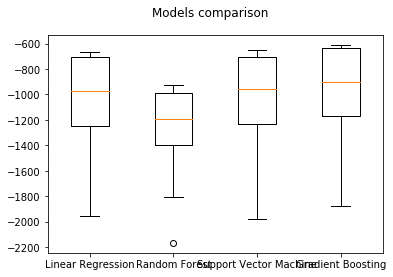

In [16]:
# prepare configuration for cross validation
seed = 7

# evaluate each model in turn
results = []
names = []

for model_name, model in models:
    print(model_name + ' ' + str(datetime.datetime.now()))
    kfold = model_selection.KFold(n_splits = 10,
                                  random_state = seed)    
    cv_results = model_selection.cross_val_score(model, X, Y,
                                                 cv = kfold,
                                                 scoring = scoring)    
    results.append(cv_results)
    names.append(model_name)

print('The End - ' + str(datetime.datetime.now()))

# boxplot models comparison
fig = plt.figure()
fig.suptitle('Models comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()